Load the data

In [5]:
import pandas as pd
data1 = pd.read_csv('D:/ProgrammingBook/AndrewNg/ex1data1.txt', sep = ',', header=None, names = ["population","profits"])
data1.head()

,population,profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Visualize the data

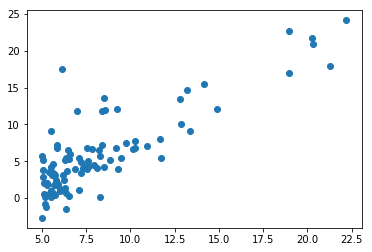

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x = data1['population'],
           y = data1['profits'])
plt.show()

Design the hypothesis function

In [215]:
import numpy as np
data1_value = data1.values
a = np.ones((data1_value.shape[0],1))
population= data1_value[:,0][..., np.newaxis]
X = np.c_[a, population]
theta = np.zeros((2,1))
alpha = 0.01 #learning rate
iterations = 1200 #the number of iterations

Update the theta parameter

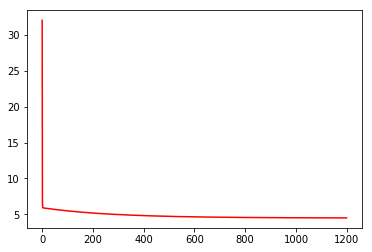

4.495983445772328
[[-3.43962171]
 [ 1.14720751]]


In [216]:
label = data1_value[:,1][..., np.newaxis]
m = label.shape[0]
cost = []

for i in range(0, iterations):
    h = np.dot(X, theta)
    diff = h-label
    cost.append(np.sum(np.power(diff, 2))/(2*m))
    temp0= theta[0,0]-alpha*np.sum(diff)/m
    res = diff*population
    temp1 = theta[1,0]-alpha*np.sum(res)/m
    theta[0,0] = temp0
    theta[1,0] = temp1
plt.plot(np.arange(iterations), cost, 'r')
plt.show()
print(cost[-1])
print(theta)

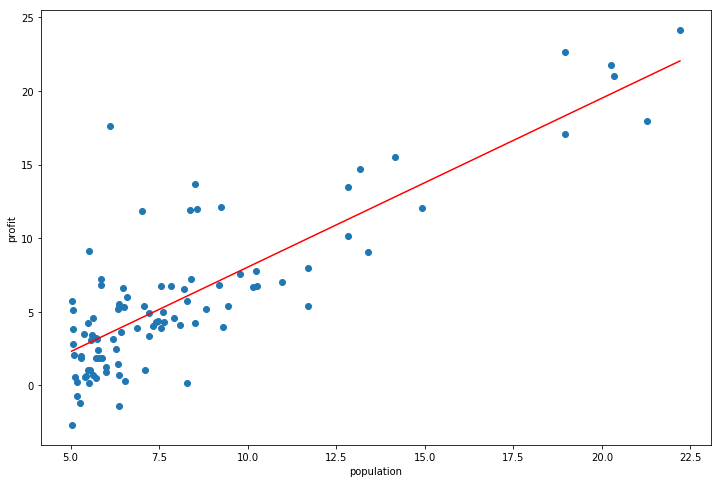

In [233]:
x = np.linspace(population.min(), population.max(), 100)
f = theta[0,0]+theta[1,0]*x
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(x = data1["population"], y = data1["profits"], label = 'Training_data')
ax.plot (x,f,'r',label = 'Prediction')
ax.set_xlabel("population")
ax.set_ylabel("profit")
plt.show()

In [235]:
def NormalEquation(X, y): #Using normal equation to solve this problem
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta
theta_normal = NormalEquation(X, label)
theta_normal

array([[-3.89578088],
       [ 1.19303364]])

Multi-variable Linear Regression Problem

In [237]:
data2 = pd.read_csv('D:/ProgrammingBook/AndrewNg/ex1data2.txt', sep = ',', header = None, 
                    names = ["size", "bedrooms", "price"])
data2.head(10)


,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [282]:
data2 = (data2-data2.mean())/data2.std()
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [287]:
data2_values = data2.values
data = data2.iloc[:,0:2]
data = data.values
a = np.ones((len(data), 1))
Data = np.c_[a, data]
theta = np.zeros((3,1))
label = data2.iloc[:,2]
label = label.values
label = label[..., np.newaxis]
len(Data)

47

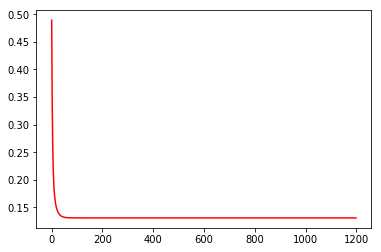

In [288]:
cost1 = []
temp = [0,0,0]
m = len(Data)
alpha = 0.1
for i in range(0, iterations):
    h = np.dot(Data ,theta)
    diff = h-label
    cost1.append(np.sum(np.power(diff, 2))/(2*m))
    for j in range(0,len(theta)):
        Temp = Data[:,j][..., np.newaxis]
        temp[j] = theta[j,0]-alpha*np.sum(diff*Temp)/m
    theta[0,0] = temp[0]
    theta[1,0] = temp[1]
    theta[2,0] = temp[2]
plt.plot(np.arange(iterations), cost1, 'r')
plt.show()

In [289]:
print(theta)
print(cost1[-1])

[[-7.69479043e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
0.13068648053904197
